# 설문조사_유사답변_데이터관리.ipynb에서 가공하고 저장한 test_finish.csv파일에서 가장 많이 나온 명사, 형용사, 동사를 WordCloud로 시각화 하는 코드

In [10]:
cd "/content/drive/MyDrive/Colab Notebooks/데이터분석"

/content/drive/MyDrive/Colab Notebooks/데이터분석


In [3]:
!pip install konlpy
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 54.5 MB/s 
     |████████████████████████████████| 453 kB 54.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import konlpy
from konlpy.tag import *
from nltk import Text
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("test_finish.csv")
df.tail(2)

,index,respondentID,Q47_1,Q48_2,Q51_2,Q369_2
1539,1596,8660,NaN,The estimated delivery window after purchasing...,"From what I recall, it listed basically every ...",I miss the home button. I don't want to use fa...
1540,1597,8675,They are very customer oriented. You make an a...,NaN,I am not a aware of any promotions from apple....,I love my iPhone 11. From day 1 (after the sho...


In [59]:
df.fillna("=",inplace=True)

In [60]:
df["Q47_1"].values

array(['=', '=', '=', ..., '=', '=',
       'They are very customer oriented. You make an appointment, show up at your time and they meet you at the door. Even if the wait is longer than expected they check in with you throughout the wait. They offer assistance on how to use the products you purchase. Answer any and all questions you might have without fear of sounding unknownable '],
      dtype=object)

In [61]:
# test용으로 하나의 컬럼만 불러오기
value = []

In [62]:
for i in range(len(df["Q47_1"].values)):
  if df["Q47_1"].values[i]!="=":
    value.append(str(df["Q47_1"].values[i]))

In [63]:
value

['Very fast in delivery of good and services all times ',
 'Nice organized website where I can find all my needs and sort items by style and pricing. Also prime shipping allows for fast convenience.',
 'I gave a high mark here due to the easy navigation of the site as well as real reviews for the products offered. The range of prices for products is very substantial and the ease of returns make Amazon my got to for most tech produtcs. ',
 'I bought a great phone for my boyfriend . For a great deal',
 'I was able to get all the needed information I want even without visiting the brand website. It gives me a detailed information about the product update and the review from users who have tried the product ',
 'It gave good customer reviews both good and bad and it was just a good avenue for information',
 'Found some information i need to decide what I want',
 'it is very nice and it is a faumas web sait it is very good ',
 'easy to discover phones and accessories that were on both the w

In [64]:
text = " ".join(value)
len(text), text[:50]

(68476, 'Very fast in delivery of good and services all tim')

# 품사별 워드클라우드 시각화

In [ ]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

In [77]:
from collections import Counter

def tokens_pos(text):
  # 불필요한 심볼 제거
  cleaned_content = re.sub(r'[^\.\?\!\w\d\s]','',text) # 문장단위로 끊기

  # 대문자를 소문자로 변환
  cleaned_content = cleaned_content.lower()

  # 각 단어를 토큰으로 나누기
  word_tokens = nltk.word_tokenize(cleaned_content)

  # pos_tag()의 입력값으로는 단어의 리스트가 들어가야 한다.
  tokens_pos = nltk.pos_tag(word_tokens)

  return tokens_pos

어떤 품사를 보고싶으싶니까?
1번 명사 	 2번 형용사
2


In [84]:
def word_cloud(word_token,n):
  words = []
  PartOfSpeech = ["NN","JJ","VBP"] # NN : 명사 , JJ : 형용사
  for word, pos in word_token:
    if PartOfSpeech[n] in pos:
        words.append(word)


  # nltk에서 제공되는 WordNetLemmatizer을 이용
  # ex) 명사의 경우는 보통 복수 -> 단수 형태로 변형
  wlem = nltk.WordNetLemmatizer()
  lemmatized_words = []
  for word in words:
      new_word = wlem.lemmatize(word)
      lemmatized_words.append(new_word)
  
  stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
  #print('stopwords: ', stopwords_list)
  unique_NN_words = set(lemmatized_words)
  final_NN_words = lemmatized_words

  # 불용어 제거
  for word in unique_NN_words:
      if word in stopwords_list:
          while word in final_NN_words: final_NN_words.remove(word)

  # 불용어 커스텀
  customized_stopwords = ['be', 'today', 'yesterday', "it's", "don’t","i","next","able","many","much","a"] # 직접 만든 불용어 사전

  unique_NN_words1 = set(final_NN_words)
  for word in unique_NN_words1:
      if word in customized_stopwords:
          while word in final_NN_words: final_NN_words.remove(word)

  # 빈도 분석
  
  return final_NN_words

In [85]:
token_pos = tokens_pos(text)
  
print("어떤 품사를 보고싶으싶니까?\n1번 명사 \t 2번 형용사 \t 3번 동사")
n = int(input(""))
final_words = word_cloud(token_pos,n-1)

어떤 품사를 보고싶으싶니까?
1번 명사 	 2번 형용사 	 3번 동사
3


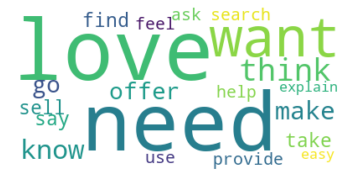

In [86]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path


test = ''
for word in final_words:
    test = test +' '+word

wordcloud = WordCloud(max_font_size=100, max_words=20, background_color='white', relative_scaling=.5).generate(test)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()